In [1]:
!pip install qiskit

In [2]:
!pip install qiskit_aer

In [3]:
!pip install pylatexenc

# Imports

In [4]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from pylatexenc import *

# Define Balanced and Constant Functions

In [5]:
def deutsch_oracle(circuit, function_type):

    # constant: f(0) = 0 and f(1) = 0
    # do nothing
    if function_type == 0:  
        pass

    # constant: f(0) = 1 and f(1) = 1
    # flip second qubit
    elif function_type == 1:  
        circuit.x(1)

    # balanced: f(0) = 0 and f(1) = 1
    # apply a CNOT gate to flip second qubit using the first qubit as control
    elif function_type == 2: 
        circuit.cx(0, 1) 

    # balanced: f(0) = 1 and f(1) = 0
    # apply a CNOT gate to flip second qubit using the first qubit as control
    # flip second qubit
    elif function_type == 3:
        circuit.cx(0, 1)
        circuit.x(1)

# Deutsch Algorithm

In [6]:
def deutsch_algorithm(function_type):
    
    # create a 2 qubit quantum circuit
    circuit = QuantumCircuit(2, 1)

    # initialize the second qubit to be |1>
    circuit.x(1)

    # apply Hadamard gates to both qubits
    circuit.h(0)
    circuit.h(1)

    # apply the oracle
    deutsch_oracle(circuit, function_type)

    # apply a Hadamard gate to the first qubit
    circuit.h(0)

    # measure the first qubit
    circuit.measure(0, 0)
    
    return circuit

# Simulate


Function Type: 3
Results: {'1': 1024}


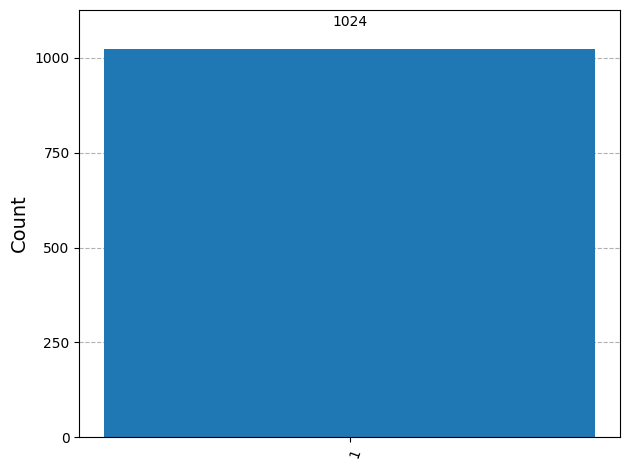

In [7]:
# define the function type (0: constant (f(0) = 0 and f(1) = 0), 
                          #1: constant (f(0) = 1 and f(1) = 1),
                          #2: balanced (f(0) = 0 and f(1) = 1),
                          #3: balanced (f(0) = 1 and f(1) = 0))

function_type = 3

# create the quantum circuit
qc = deutsch_algorithm(function_type)

# simulation
simulator = Aer.get_backend('qasm_simulator')
result = simulator.run(qc, shots = 1024).result()
counts = result.get_counts()
fig = qc.draw(output='mpl')
fig.savefig("deutsch_circuit"+str(function_type)+".png")

# display the results
print("\nFunction Type:", function_type)
print("Results:", counts)
plot_histogram(counts)